# Tree and Ensemble Classifiers #

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import graphviz

from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import tree
from sklearn import ensemble

In [3]:
# read in data set with categorical variables turned into dummy variablees
df = pd.read_csv('data/cleaned_data/md_dum.csv')

# create X and y values for modeling, this time using a mask to create 1 and 0 values for classification
car_c_y = df.car_acc_score.mask(df.car_acc_score > 0, 1)
car_X = df.drop(columns=['Unnamed: 0', 'car_acc_score', 'car_dens_score', 'bike_dens_score'])
bike_c_y = df.bike_acc_score.mask(df.bike_acc_score > 0, 1)
bike_X = df.drop(columns=['Unnamed: 0', 'bike_acc_score', 'car_dens_score', 'bike_dens_score'])

In [4]:
# train test split
X_car_c_train, X_car_c_test, y_car_c_train, y_car_c_test = train_test_split(car_X, car_c_y, test_size=0.3, 
                                                                            random_state=18,
                                                                            shuffle=True, stratify=car_c_y)
X_bike_c_train, X_bike_c_test, y_bike_c_train, y_bike_c_test = train_test_split(bike_X, bike_c_y, test_size=0.3, 
                                                                            random_state=18,
                                                                            shuffle=True, stratify=bike_c_y)

### Decision Tree Classifier ###

In [4]:
dtc = tree.DecisionTreeClassifier()
dtc.fit(X_car_c_train, y_car_c_train)
dtc.score(X_car_c_test, y_car_c_test)

0.8864954805054639

[[11328  1155]
 [ 1369  8385]]


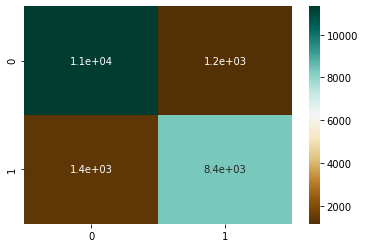

In [5]:
pred = dtc.predict(X_car_c_test)
c=confusion_matrix(y_car_c_test, pred)
sns.heatmap(c,cmap='BrBG',annot=True)
print(c)
plt.show()

In [6]:
print(classification_report(y_car_c_test, pred))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90     12483
           1       0.88      0.86      0.87      9754

    accuracy                           0.89     22237
   macro avg       0.89      0.88      0.88     22237
weighted avg       0.89      0.89      0.89     22237



In [7]:
# viewing the decision tree graph
import graphviz
dot_data = tree.export_graphviz(dtc, out_file=None)
graph = graphviz.Source(dot_data)
graph

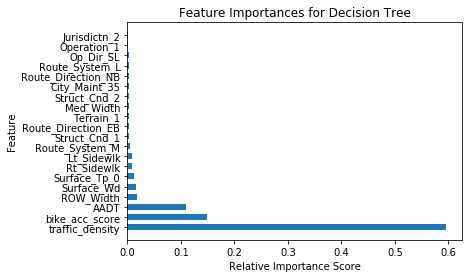

In [8]:
# view 20 most important features

dt_feature_importances = dtc.feature_importances_
dt_feature_names, dt_feature_scores = zip(*sorted(zip(X_car_c_train.columns, dt_feature_importances), 
                                                          key=lambda x: -x[1]))
y_position = list(range(len(dt_feature_names[:20])))
plt.barh(y_position, dt_feature_scores[:20], height=0.6, align='center')
plt.yticks(y_position , dt_feature_names[:20])
plt.xlabel('Relative Importance Score')
plt.ylabel('Feature')
t = plt.title('Feature Importances for Decision Tree')

The decision tree is surprisingly effective for car accidents. Let's see how it performs for bike accidents.

In [9]:
dtc.fit(X_bike_c_train, y_bike_c_train)
dtc.score(X_bike_c_test, y_bike_c_test)

0.9024598641903134

[[16612   914]
 [ 1255  3456]]


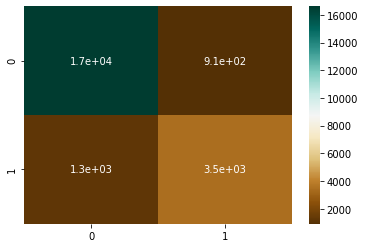

In [10]:
pred = dtc.predict(X_bike_c_test)
c=confusion_matrix(y_bike_c_test, pred)
print(c)
sns.heatmap(c,cmap='BrBG',annot=True)
plt.show()

In [11]:
print(classification_report(y_bike_c_test, pred))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94     17526
           1       0.79      0.73      0.76      4711

    accuracy                           0.90     22237
   macro avg       0.86      0.84      0.85     22237
weighted avg       0.90      0.90      0.90     22237



This actually works better for bike accidents, which is the first time I've found that!

### Random Forest Classifier ###

In [12]:
rfc = ensemble.RandomForestClassifier()
rfc.fit(X_car_c_train, y_car_c_train)
score = rfc.score(X_car_c_test, y_car_c_test)
print('Random Forest Classifier accuracy score is {}'.format(score))

Random Forest Classifier accuracy score is 0.8845617664253271


[[11200  1283]
 [ 1284  8470]]


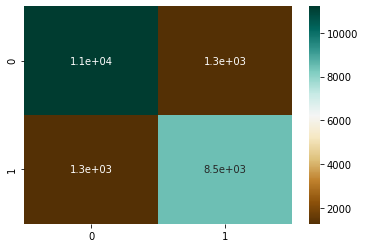

In [13]:
pred = rfc.predict(X_car_c_test)
c=confusion_matrix(y_car_c_test, pred)
print(c)
sns.heatmap(c,cmap='BrBG',annot=True)
plt.show()

In [14]:
print(classification_report(y_car_c_test, pred)

              precision    recall  f1-score   support

           0       0.90      0.90      0.90     12483
           1       0.87      0.87      0.87      9754

    accuracy                           0.88     22237
   macro avg       0.88      0.88      0.88     22237
weighted avg       0.88      0.88      0.88     22237



In [5]:
rfc = ensemble.RandomForestClassifier()
rfc.fit(X_bike_c_train, y_bike_c_train)
score = rfc.score(X_bike_c_test, y_bike_c_test)
print('Random Forest Classifier accuracy score is {}'.format(score))

Random Forest Classifier accuracy score is 0.9077213652920808


[[16826   700]
 [ 1352  3359]]


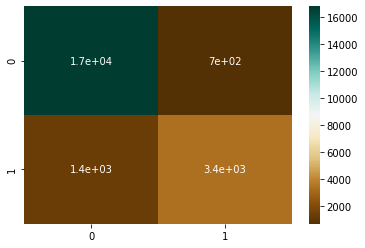

In [6]:
pred = rfc.predict(X_bike_c_test)
c=confusion_matrix(y_bike_c_test, pred)
print(c)
sns.heatmap(c,cmap='BrBG',annot=True)
plt.show()

In [11]:
print(classification_report(y_bike_c_test, pred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95     17526
           1       0.86      0.70      0.77      4711

    accuracy                           0.91     22237
   macro avg       0.89      0.84      0.86     22237
weighted avg       0.91      0.91      0.91     22237



### Bagging Classifier ###

In [15]:
bc = ensemble.BaggingClassifier()
bc.fit(X_car_c_train, y_car_c_train)
score = bc.score(X_car_c_test, y_car_c_test)
print('Bagging Classifier accuracy score is {}'.format(score))

Bagging Classifier accuracy score is 0.894545127490219


[[11469  1014]
 [ 1331  8423]]


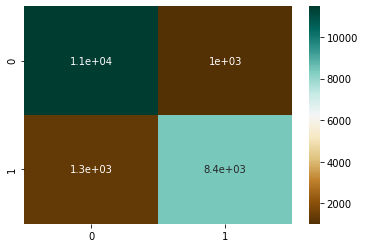

In [16]:
pred = bc.predict(X_car_c_test)
c=confusion_matrix(y_car_c_test, pred)
print(c)
sns.heatmap(c,cmap='BrBG',annot=True)
plt.show()

In [17]:
print(classification_report(y_car_c_test, pred))

              precision    recall  f1-score   support

           0       0.90      0.92      0.91     12483
           1       0.89      0.86      0.88      9754

    accuracy                           0.89     22237
   macro avg       0.89      0.89      0.89     22237
weighted avg       0.89      0.89      0.89     22237



In [8]:
bc = ensemble.BaggingClassifier()
bc.fit(X_bike_c_train, y_bike_c_train)
score = bc.score(X_bike_c_test, y_bike_c_test)
print('Bagging Classifier accuracy score is {}'.format(score))

Bagging Classifier accuracy score is 0.9132976570580564


[[17005   521]
 [ 1407  3304]]


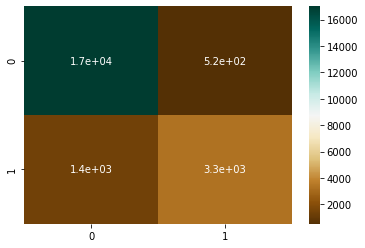

In [9]:
pred = bc.predict(X_bike_c_test)
c=confusion_matrix(y_bike_c_test, pred)
print(c)
sns.heatmap(c,cmap='BrBG',annot=True)
plt.show()

In [10]:
print(classification_report(y_bike_c_test, pred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95     17526
           1       0.86      0.70      0.77      4711

    accuracy                           0.91     22237
   macro avg       0.89      0.84      0.86     22237
weighted avg       0.91      0.91      0.91     22237



### Gradient Boosting Classifier

Gradient Boosting Score: 0.884606736520214
[[11407  1076]
 [ 1490  8264]]


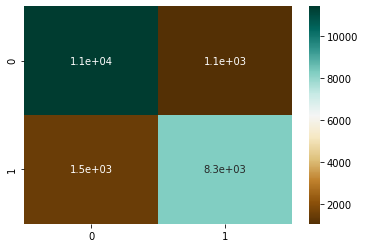

In [18]:
gbc = ensemble.GradientBoostingClassifier()
gbc.fit(X_car_c_train, y_car_c_train)
print('Gradient Boosting Score: {}'.format(gbc.score(X_car_c_test, y_car_c_test)))
pred = gbc.predict(X_car_c_test)
c=confusion_matrix(y_car_c_test, pred)
print(c)
sns.heatmap(c,cmap='BrBG',annot=True)
plt.show()

In [19]:
c=classification_report(y_car_c_test, pred)
print(c)

              precision    recall  f1-score   support

           0       0.88      0.91      0.90     12483
           1       0.88      0.85      0.87      9754

    accuracy                           0.88     22237
   macro avg       0.88      0.88      0.88     22237
weighted avg       0.88      0.88      0.88     22237



Gradient Boosting Score: 0.8948599181544273
[[17297   229]
 [ 2109  2602]]


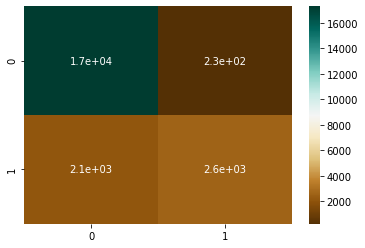

In [12]:
gbc = ensemble.GradientBoostingClassifier()
gbc.fit(X_bike_c_train, y_bike_c_train)
print('Gradient Boosting Score: {}'.format(gbc.score(X_bike_c_test, y_bike_c_test)))
pred = gbc.predict(X_bike_c_test)
c=confusion_matrix(y_bike_c_test, pred)
print(c)
sns.heatmap(c,cmap='BrBG',annot=True)
plt.show()

In [13]:
c=classification_report(y_bike_c_test, pred)
print(c)

              precision    recall  f1-score   support

           0       0.89      0.99      0.94     17526
           1       0.92      0.55      0.69      4711

    accuracy                           0.89     22237
   macro avg       0.91      0.77      0.81     22237
weighted avg       0.90      0.89      0.88     22237



### AdaBoost Classifier ###

AdaBoost Score: 0.8585240814858119
[[10237  2246]
 [  900  8854]]


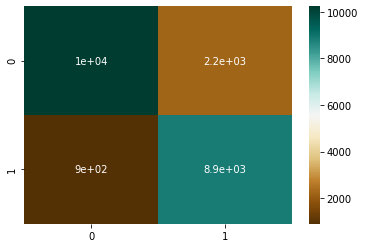

In [20]:
abc = ensemble.AdaBoostClassifier()
abc.fit(X_car_c_train, y_car_c_train)
score = abc.score(X_car_c_test, y_car_c_test)
print('AdaBoost Score: {}'.format(score))
pred = abc.predict(X_car_c_test)
c=confusion_matrix(y_car_c_test, pred)
print(c)
sns.heatmap(c,cmap='BrBG',annot=True)
plt.show()

In [21]:
c=classification_report(y_car_c_test, pred)
print(c)

              precision    recall  f1-score   support

           0       0.92      0.82      0.87     12483
           1       0.80      0.91      0.85      9754

    accuracy                           0.86     22237
   macro avg       0.86      0.86      0.86     22237
weighted avg       0.87      0.86      0.86     22237



AdaBoost Score: 0.8841120654764582
[[17025   501]
 [ 2076  2635]]


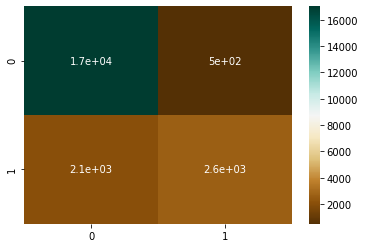

In [14]:
abc = ensemble.AdaBoostClassifier()
abc.fit(X_bike_c_train, y_bike_c_train)
score = abc.score(X_bike_c_test, y_bike_c_test)
print('AdaBoost Score: {}'.format(score))
pred = abc.predict(X_bike_c_test)
c=confusion_matrix(y_bike_c_test, pred)
print(c)
sns.heatmap(c,cmap='BrBG',annot=True)
plt.show()

In [15]:
c=classification_report(y_bike_c_test, pred)
print(c)

              precision    recall  f1-score   support

           0       0.89      0.97      0.93     17526
           1       0.84      0.56      0.67      4711

    accuracy                           0.88     22237
   macro avg       0.87      0.77      0.80     22237
weighted avg       0.88      0.88      0.87     22237

